In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
dataframe = pd.read_csv('C:/Users/BRENDA/Documents/SOTA/KNN/PSL-GAN-ad521b837aa1cabd3bbc6e72459104d0ca7cb72a/new_data.csv')
X = dataframe.iloc[:,:-1].values
y = dataframe.iloc[:,-1].values


In [3]:
dataframe 

,0,1,2,3,4,5,6,7,8,9,...,471,472,473,474,475,476,477,478,479,class
0,0.536879,0.560019,0.574746,0.588373,0.514476,0.498891,0.487184,0.605967,0.457014,0.563008,...,0.451336,0.708650,0.408340,0.741280,0.378446,0.695142,0.387260,0.683276,0.371629,abuelo
1,0.450507,0.477267,0.494116,0.505951,0.430992,0.417016,0.403644,0.537296,0.398238,0.485602,...,0.439561,0.657615,0.389346,0.661473,0.366553,0.636251,0.378047,0.625526,0.377634,abuelo
2,0.451338,0.472543,0.487261,0.499483,0.424764,0.410258,0.395362,0.516860,0.364673,0.476544,...,0.440477,0.636592,0.401662,0.648156,0.371538,0.612238,0.384219,0.602863,0.384543,abuelo
3,0.504347,0.515761,0.526263,0.535340,0.479179,0.460419,0.441318,0.529941,0.397781,0.514813,...,0.418013,0.674108,0.368999,0.692755,0.342286,0.662636,0.362826,0.648935,0.385251,abuelo
4,0.518540,0.542916,0.558174,0.575456,0.492735,0.471874,0.453949,0.599943,0.424564,0.550026,...,0.803506,0.480661,0.798891,0.473521,0.742080,0.464757,0.734659,0.464096,0.498866,agua
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.529019,0.552916,0.568337,0.585308,0.513109,0.500777,0.484550,0.615657,0.463690,0.554367,...,0.469097,0.678721,0.439924,0.684832,0.407692,0.642581,0.413363,0.632482,0.382558,yo
220,0.510456,0.533686,0.548950,0.562808,0.480997,0.461677,0.446023,0.585832,0.420506,0.544833,...,0.816521,0.476476,0.875901,0.402914,0.830945,0.369892,0.811589,0.398821,0.503382,él
221,0.500710,0.526540,0.543197,0.556609,0.472630,0.453960,0.435362,0.578777,0.414568,0.536728,...,0.833425,0.540693,0.882536,0.467590,0.837087,0.440428,0.820307,0.461492,0.506052,él
222,0.492722,0.525487,0.542215,0.555085,0.469453,0.452221,0.434530,0.580593,0.411698,0.528915,...,0.820023,0.505502,0.863750,0.432645,0.812524,0.401690,0.795971,0.433360,0.501797,él


In [4]:
dataframe['class'].unique()  #56 classes

array(['abuelo', 'agua', 'ahora', 'antes', 'aprender', 'aquí', 'bien',
       'carne', 'casa', 'comer', 'continuar', 'controlar', 'cuerpo',
       'cuánto', 'cómo', 'decir', 'dentro', 'diferentes', 'ellos',
       'emoción', 'enojar', 'escribir', 'ese', 'familia', 'frijol',
       'fuerte', 'fácil', 'grasa', 'hacer', 'hermano', 'hola', 'hoy',
       'juntos', 'mal', 'mamá', 'niños', 'no', 'pensar', 'pero', 'planta',
       'poder', 'proteínas', 'quinto', 'qué', 'recordar', 'sentir',
       'sexto', 'sí', 'también', 'todo', 'tú', 'venir', 'ver', 'ya', 'yo',
       'él'], dtype=object)

In [5]:
len(dataframe['class'].unique())

56

In [6]:
X

array([[0.5368793 , 0.56001943, 0.57474613, ..., 0.38726029, 0.68327588,
        0.37162906],
       [0.4505069 , 0.47726718, 0.49411553, ..., 0.37804747, 0.62552571,
        0.37763438],
       [0.45133752, 0.47254333, 0.48726106, ..., 0.38421932, 0.60286337,
        0.38454291],
       ...,
       [0.50071037, 0.52654034, 0.54319745, ..., 0.82030672, 0.4614923 ,
        0.5060519 ],
       [0.49272183, 0.52548659, 0.54221517, ..., 0.79597104, 0.43336034,
        0.50179741],
       [0.50849628, 0.53693718, 0.55553871, ..., 0.78103507, 0.4334031 ,
        0.50345963]])

In [7]:
y

array(['abuelo', 'abuelo', 'abuelo', 'abuelo', 'agua', 'agua', 'agua',
       'agua', 'ahora', 'ahora', 'ahora', 'ahora', 'antes', 'antes',
       'antes', 'antes', 'aprender', 'aprender', 'aprender', 'aprender',
       'aquí', 'aquí', 'aquí', 'aquí', 'bien', 'bien', 'bien', 'bien',
       'carne', 'carne', 'carne', 'carne', 'casa', 'casa', 'casa', 'casa',
       'comer', 'comer', 'comer', 'comer', 'continuar', 'continuar',
       'continuar', 'continuar', 'controlar', 'controlar', 'controlar',
       'controlar', 'cuerpo', 'cuerpo', 'cuerpo', 'cuerpo', 'cuánto',
       'cuánto', 'cuánto', 'cuánto', 'cómo', 'cómo', 'cómo', 'cómo',
       'decir', 'decir', 'decir', 'decir', 'dentro', 'dentro', 'dentro',
       'dentro', 'diferentes', 'diferentes', 'diferentes', 'diferentes',
       'ellos', 'ellos', 'ellos', 'ellos', 'emoción', 'emoción',
       'emoción', 'emoción', 'enojar', 'enojar', 'enojar', 'enojar',
       'escribir', 'escribir', 'escribir', 'escribir', 'ese', 'ese',
       'ese'

In [8]:
Labelencoder_Y = LabelEncoder()
y= Labelencoder_Y.fit_transform(y)
y

array([ 0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  3,  4,
        4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,
        8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12,
       12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16,
       17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21,
       21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25,
       25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29,
       29, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33,
       34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 36, 37, 37, 37, 37, 38,
       38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 42, 42,
       42, 42, 43, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45, 45, 46, 46, 46,
       46, 47, 47, 47, 47, 48, 48, 48, 48, 49, 49, 49, 49, 50, 50, 50, 50,
       51, 51, 51, 51, 52, 52, 52, 52, 53, 53, 53, 53, 54, 54, 54, 54, 55,
       55, 55, 55])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_test.shape

(56, 480)

([<matplotlib.axis.XTick at 0x1bff16d2c88>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

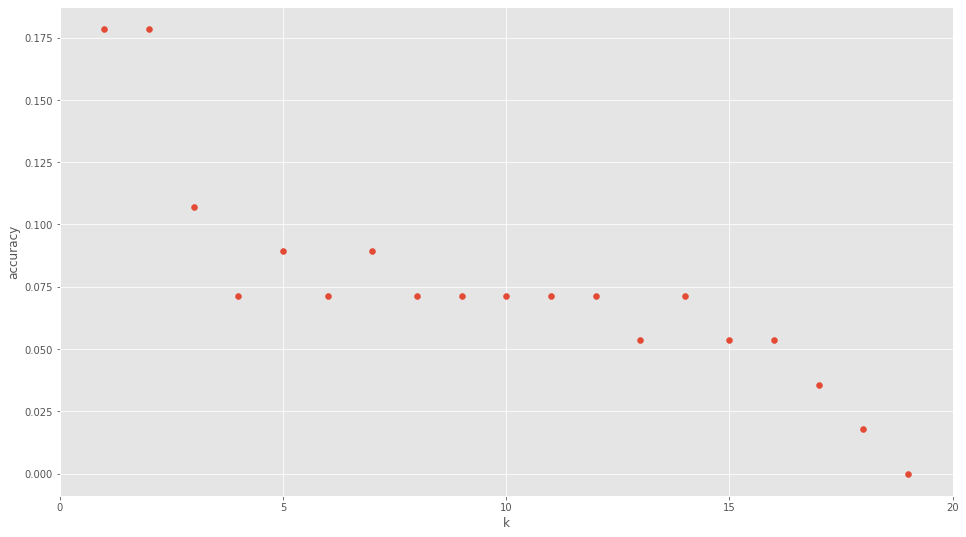

In [11]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [12]:
n_neighbors = 2
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.57
Accuracy of K-NN classifier on test set: 0.18


In [13]:
import pandas as pd
#pd.set_option('display.max_rows', 11500)
#pd.set_option('display.max_columns', 11500)
#pd.set_option('display.width', 111000)
#pd.set_option('display.expand_frame_repr', False)
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
# Environment settings: 
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

#pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

pd.options.display.max_rows = 999

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [18]:
pred.shape

(56,)

In [ ]:
#PREGUNTA: SI PRED TIENE SHAPE 56 Y Y_TEST TAMBIÉN, POR QUÉ ENTONCES LA CONFUSISON MATRIX TIENE 45 Y 45 DE SHAPE ???

In [19]:
y_test.shape

(56,)

In [15]:
a = confusion_matrix(y_test, pred)

In [17]:
a.shape

(45, 45)

In [22]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, pred)

print(cf_matrix)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 

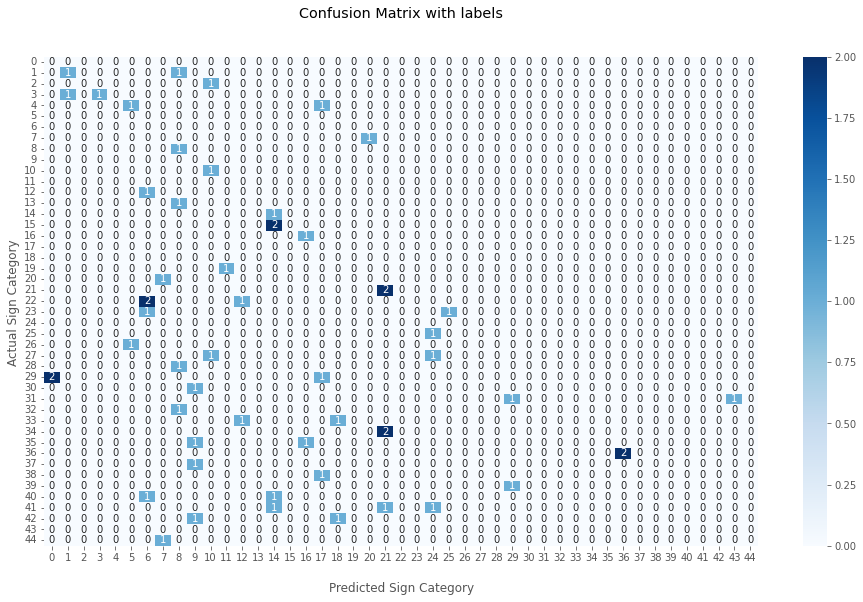

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Sign Category')
ax.set_ylabel('Actual Sign Category ');

In [24]:
ax

<AxesSubplot:title={'center':'Confusion Matrix with labels\n\n'}, xlabel='\nPredicted Sign Category', ylabel='Actual Sign Category '>

In [25]:
'''

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Sign Category')
ax.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order



temp1 = ax.xaxis.set_ticklabels(['abuelo', 'agua', 'ahora', 'antes', 'aprender', 'aquí', 'bien',
       'carne', 'casa', 'comer', 'continuar', 'controlar', 'cuerpo',
       'cuánto', 'cómo', 'decir', 'dentro', 'diferentes', 'ellos',
       'emoción', 'enojar', 'escribir', 'ese', 'familia', 'frijol',
       'fuerte', 'fácil', 'grasa', 'hacer', 'hermano', 'hola', 'hoy',
       'juntos', 'mal', 'mamá', 'niños', 'no', 'pensar', 'pero', 'planta',
       'poder', 'proteínas', 'quinto', 'qué', 'recordar', 'sentir',
       'sexto', 'sí', 'también', 'todo', 'tú', 'venir', 'ver', 'ya', 'yo',
       'él'])

temp1.array()


temp2 = ax.yaxis.set_ticklabels(['abuelo', 'agua', 'ahora', 'antes', 'aprender', 'aquí', 'bien',
       'carne', 'casa', 'comer', 'continuar', 'controlar', 'cuerpo',
       'cuánto', 'cómo', 'decir', 'dentro', 'diferentes', 'ellos',
       'emoción', 'enojar', 'escribir', 'ese', 'familia', 'frijol',
       'fuerte', 'fácil', 'grasa', 'hacer', 'hermano', 'hola', 'hoy',
       'juntos', 'mal', 'mamá', 'niños', 'no', 'pensar', 'pero', 'planta',
       'poder', 'proteínas', 'quinto', 'qué', 'recordar', 'sentir',
       'sexto', 'sí', 'también', 'todo', 'tú', 'venir', 'ver', 'ya', 'yo',
       'él'])

temp2.shape
## Display the visualization of the Confusion Matrix.
plt.show()
'''

"\n\nax.set_title('Confusion Matrix with labels\n\n');\nax.set_xlabel('\nPredicted Sign Category')\nax.set_ylabel('Actual Sign Category ');\n\n## Ticket labels - List must be in alphabetical order\n\n\n\ntemp1 = ax.xaxis.set_ticklabels(['abuelo', 'agua', 'ahora', 'antes', 'aprender', 'aquí', 'bien',\n       'carne', 'casa', 'comer', 'continuar', 'controlar', 'cuerpo',\n       'cuánto', 'cómo', 'decir', 'dentro', 'diferentes', 'ellos',\n       'emoción', 'enojar', 'escribir', 'ese', 'familia', 'frijol',\n       'fuerte', 'fácil', 'grasa', 'hacer', 'hermano', 'hola', 'hoy',\n       'juntos', 'mal', 'mamá', 'niños', 'no', 'pensar', 'pero', 'planta',\n       'poder', 'proteínas', 'quinto', 'qué', 'recordar', 'sentir',\n       'sexto', 'sí', 'también', 'todo', 'tú', 'venir', 'ver', 'ya', 'yo',\n       'él'])\n\ntemp1.array()\n\n\ntemp2 = ax.yaxis.set_ticklabels(['abuelo', 'agua', 'ahora', 'antes', 'aprender', 'aquí', 'bien',\n       'carne', 'casa', 'comer', 'continuar', 'controlar', 'cuerp

In [26]:
X.shape

(224, 480)

In [27]:
X

array([[0.5368793 , 0.56001943, 0.57474613, 0.58837336, 0.51447606,
        0.49889132, 0.48718432, 0.60596716, 0.45701352, 0.56300819,
        0.502415  , 0.70176452, 0.32716244, 0.82694668, 0.20294176,
        0.65975982, 0.38842312, 0.61516625, 0.44797966, 0.60473645,
        0.46838132, 0.60981339, 0.45327413, 0.51446348, 0.50922507,
        0.53438175, 0.54950225, 0.55972445, 0.48834518, 0.47318849,
        0.45803651, 0.57900101, 0.43536773, 0.53661561, 0.47418332,
        0.67873383, 0.31301731, 0.82310766, 0.19025406, 0.62758672,
        0.39129299, 0.55979741, 0.45384941, 0.55041933, 0.47385031,
        0.56310838, 0.45918217, 0.49587557, 0.49472135, 0.52085012,
        0.53473645, 0.54392123, 0.47604281, 0.45996353, 0.44516078,
        0.5694102 , 0.42257506, 0.52089387, 0.45939404, 0.67055976,
        0.30186951, 0.80044651, 0.18883947, 0.56705582, 0.3890709 ,
        0.50068825, 0.45600531, 0.49553573, 0.47497872, 0.51241869,
        0.45843774, 0.48621464, 0.4656252 , 0.49

# Tokenization

In [28]:
# Perform standard imports:
import es_core_news_sm #español
import spacy
nlp = es_core_news_sm.load()
doc1 = nlp(u"ellos venir ya ese continuar recordar sentir aprender abuelo ver todo diferentes no decir antes escribir familia poder bien qué sí él ahora dentro quinto frijol proteínas cómo enojar hola cuánto también casa carne fácil pensar mamá yo pero juntos tú planta mal aquí cuerpo fuerte grasa hoy niños emoción hermano controlar sexto agua comer hacer")

for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma_)

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'es_core_news_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.2.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


ellos 	 PRON 	 él
venir 	 VERB 	 venir
ya 	 ADV 	 ya
ese 	 DET 	 ese
continuar 	 VERB 	 continuar
recordar 	 VERB 	 recordar
sentir 	 VERB 	 sentir
aprender 	 VERB 	 aprender
abuelo 	 NOUN 	 abuelo
ver 	 VERB 	 ver
todo 	 DET 	 todo
diferentes 	 ADJ 	 diferente
no 	 ADV 	 no
decir 	 VERB 	 decir
antes 	 ADV 	 antes
escribir 	 VERB 	 escribir
familia 	 NOUN 	 familia
poder 	 AUX 	 poder
bien 	 ADV 	 bien
qué 	 PRON 	 qué
sí 	 INTJ 	 sí
él 	 PRON 	 él
ahora 	 ADV 	 ahora
dentro 	 ADV 	 dentro
quinto 	 ADJ 	 quinto
frijol 	 NOUN 	 frijol
proteínas 	 ADJ 	 proteína
cómo 	 PRON 	 cómo
enojar 	 VERB 	 enojar
hola 	 VERB 	 holar
cuánto 	 PRON 	 cuánto
también 	 ADV 	 también
casa 	 VERB 	 casar
carne 	 NOUN 	 carne
fácil 	 ADJ 	 fácil
pensar 	 VERB 	 pensar
mamá 	 ADJ 	 mamá
yo 	 PRON 	 yo
pero 	 CCONJ 	 pero
juntos 	 ADJ 	 junto
tú 	 PRON 	 tú
planta 	 VERB 	 plantar
mal 	 ADV 	 mal
aquí 	 ADV 	 aquí
cuerpo 	 ADV 	 cuerpo
fuerte 	 ADJ 	 fuerte
grasa 	 NOUN 	 grasa
hoy 	 ADV 	 hoy
niños 	 NOU

# Verbs
# - 3 neighbors (optimal): Better accuracy in test : 31% ( + 13% ) 

In [3]:
verbs = [ 'venir' , 'continuar' , 'recordar','sentir','aprender', 'ver','decir','escribir', 'enojar', 'pensar', 'controlar', 'comer', 'hacer']

In [4]:
verbs = dataframe.loc[(dataframe['class'] == 'venir') | (dataframe['class'] == 'continuar')  |  (dataframe['class'] == 'recordar') | (dataframe['class'] == 'sentir') | 
(dataframe['class'] == 'aprender') | (dataframe['class'] == 'ver') | (dataframe['class'] == 'decir') | (dataframe['class'] == 'escribir') | (dataframe['class'] == 'enojar') |
 (dataframe['class'] == 'pensar') | (dataframe['class'] == 'controlar') | (dataframe['class'] == 'comer') | (dataframe['class'] == 'hacer')

]
print (verbs)


            0         1         2         3         4         5         6  \
16   0.495806  0.523832  0.543781  0.561008  0.480482  0.470032  0.456728   
17   0.514383  0.548351  0.566327  0.582206  0.492199  0.473182  0.458070   
18   0.534864  0.561178  0.575552  0.589922  0.518197  0.505109  0.491974   
19   0.507151  0.533556  0.546433  0.562941  0.480936  0.461135  0.445064   
36   0.493877  0.530692  0.547995  0.563209  0.471933  0.453116  0.436547   
37   0.500856  0.534088  0.550205  0.566782  0.473802  0.455759  0.437417   
38   0.497331  0.523912  0.542340  0.555921  0.467272  0.448486  0.431244   
39   0.480276  0.514460  0.537248  0.557137  0.465343  0.450255  0.433831   
40   0.502513  0.533360  0.548462  0.566674  0.477699  0.456604  0.439739   
41   0.493856  0.521010  0.537012  0.549263  0.466690  0.448511  0.429773   
42   0.493977  0.524513  0.540456  0.553872  0.469871  0.451555  0.433315   
43   0.503084  0.530310  0.544901  0.556997  0.475161  0.455926  0.437699   

In [5]:
verbs.shape

(52, 481)

In [31]:
X_verbs = verbs.iloc[:,:-1].values
y_verbs = verbs.iloc[:,-1].values


([<matplotlib.axis.XTick at 0x1bff8679b88>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

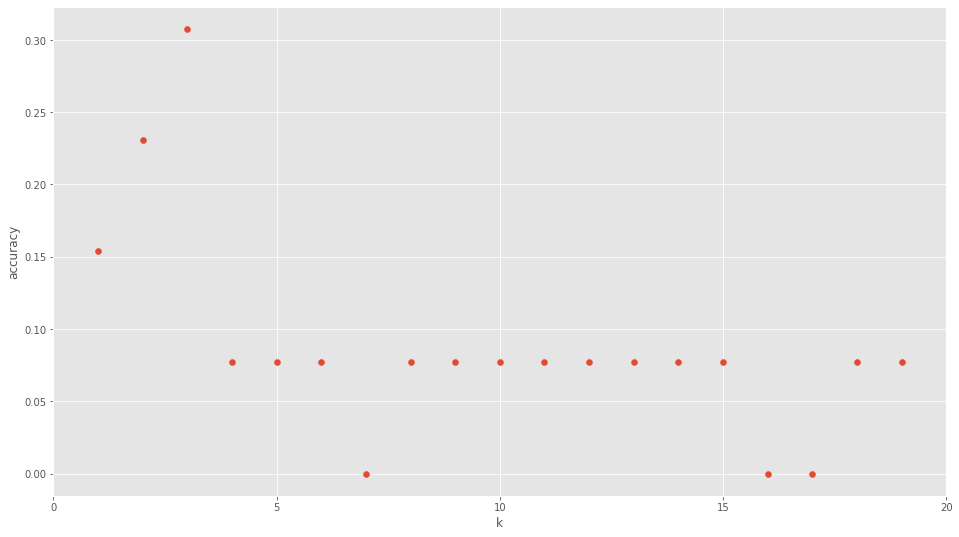

In [32]:

X_train_verbs, X_test_verbs, y_train_verbs, y_test_verbs = train_test_split(X_verbs, y_verbs, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_verbs = scaler.fit_transform(X_train_verbs)
X_test_verbs = scaler.transform(X_test_verbs)

k_range_verbs = range(1, 20)
scores_verbs = []
for k in k_range_verbs:
    knn_verbs = KNeighborsClassifier(n_neighbors = k)
    knn_verbs.fit(X_train_verbs, y_train_verbs)
    scores_verbs.append(knn_verbs.score(X_test_verbs, y_test_verbs))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_verbs, scores_verbs)
plt.xticks([0,5,10,15,20])



In [34]:
n_neighbors_verbs = 3
 
knn_verbs = KNeighborsClassifier(n_neighbors_verbs)
knn_verbs.fit(X_train_verbs, y_train_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_verbs.score(X_train_verbs, y_train_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_verbs.score(X_test_verbs, y_test_verbs)))
	 
	 
pred_verbs = knn_verbs.predict(X_test_verbs)
print(confusion_matrix(y_test_verbs, pred_verbs))

Accuracy of K-NN classifier on training set: 0.44
Accuracy of K-NN classifier on test set: 0.31
[[1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]]


# Adverbs 
# - Better accuracy in test (1 neighbor) : 27% ( + 9% ) 

            0         1         2         3         4         5         6  \
8    0.456072  0.480035  0.496808  0.510284  0.434447  0.420511  0.406120   
9    0.497956  0.524619  0.540973  0.554083  0.469488  0.452314  0.434461   
10   0.487753  0.510350  0.528023  0.543795  0.458116  0.439284  0.423587   
11   0.485007  0.508498  0.524097  0.538698  0.455830  0.437416  0.419433   
12   0.468908  0.488914  0.504557  0.519750  0.444054  0.428529  0.416296   
13   0.482099  0.499858  0.513034  0.529709  0.462081  0.447386  0.432120   
14   0.510570  0.541926  0.559100  0.574823  0.484824  0.463152  0.445030   
15   0.505693  0.538380  0.555673  0.572347  0.482228  0.466686  0.450161   
20   0.491657  0.524457  0.543264  0.562140  0.473280  0.456512  0.444439   
21   0.501682  0.524626  0.536134  0.545487  0.484319  0.470644  0.458226   
22   0.495072  0.524544  0.543411  0.558205  0.470529  0.452505  0.436175   
23   0.517482  0.549593  0.567344  0.587105  0.500536  0.483364  0.467297   

([<matplotlib.axis.XTick at 0x1bbc7516048>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

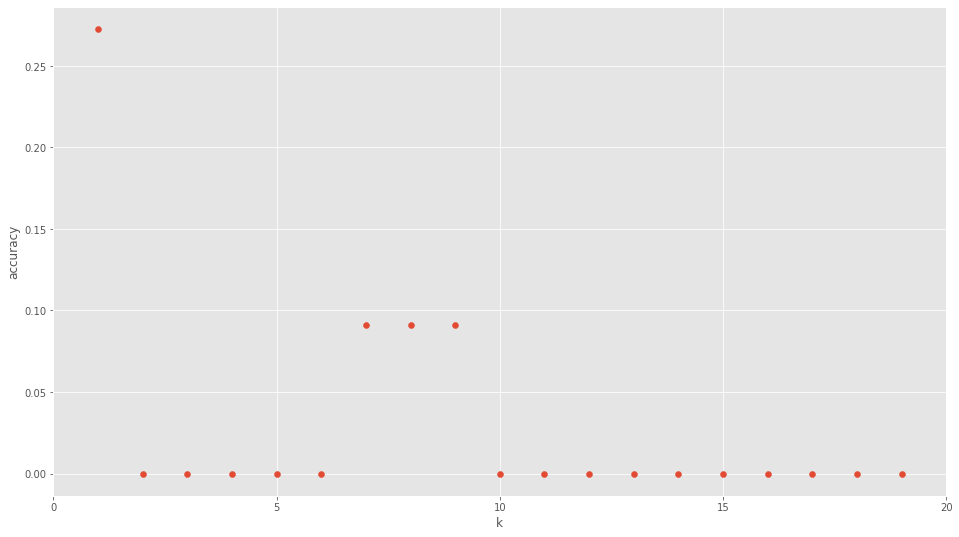

In [6]:

adverbs = [ 'ya', 'no', 'antes','bien','ahora', 'dentro','también','mal', 'aquí', 'cuerpo', 'hoy']

#adverbs = dataframe .loc[dataframe['class'] == 'venir',  'continuar', 'recordar','sentir','aprender', 'ver','decir','escribir', 'enojar', 'pensar', 'controlar', 'comer', 'hacer']
#print (adverbs)

adverbs = dataframe.loc[(dataframe['class'] == 'ya') | (dataframe['class'] == 'no') |  (dataframe['class'] == 'antes') | (dataframe['class'] == 'bien') | 
(dataframe['class'] == 'ahora') | (dataframe['class'] == 'dentro') | (dataframe['class'] == 'también') | (dataframe['class'] == 'mal') | (dataframe['class'] == 'aquí') |
 (dataframe['class'] == 'cuerpo') | (dataframe['class'] == 'hoy')
]

print (adverbs)

X_adverbs = adverbs.iloc[:,:-1].values
y_adverbs = adverbs.iloc[:,-1].values

X_train_adverbs, X_test_adverbs, y_train_adverbs, y_test_adverbs = train_test_split(X_adverbs, y_adverbs, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_adverbs = scaler.fit_transform(X_train_adverbs)
X_test_adverbs = scaler.transform(X_test_adverbs)

k_range_adverbs = range(1, 20)
scores_adverbs = []
for k in k_range_adverbs:
    knn_adverbs = KNeighborsClassifier(n_neighbors = k)
    knn_adverbs.fit(X_train_adverbs, y_train_adverbs)
    scores_adverbs.append(knn_adverbs.score(X_test_adverbs, y_test_adverbs))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_adverbs, scores_adverbs)
plt.xticks([0,5,10,15,20])


In [8]:
adverbs.shape

(44, 481)

In [7]:
n_neighbors_adverbs = 1
 
knn_adverbs = KNeighborsClassifier(n_neighbors_adverbs)
knn_adverbs.fit(X_train_adverbs, y_train_adverbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_adverbs.score(X_train_adverbs, y_train_adverbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_adverbs.score(X_test_adverbs, y_test_adverbs)))
	 
	 
pred_adverbs = knn_adverbs.predict(X_test_adverbs)
print(confusion_matrix(y_test_adverbs, pred_adverbs))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.27
[[1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0]
 [1 0 1 0 2 0 0 0 0]
 [0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0]]


# Nouns
# - Better accuracy in test (1 neighbor) : 8% ( -10% ) 

            0         1         2         3         4         5         6  \
0    0.536879  0.560019  0.574746  0.588373  0.514476  0.498891  0.487184   
1    0.450507  0.477267  0.494116  0.505951  0.430992  0.417016  0.403644   
2    0.451338  0.472543  0.487261  0.499483  0.424764  0.410258  0.395362   
3    0.504347  0.515761  0.526263  0.535340  0.479179  0.460419  0.441318   
4    0.518540  0.542916  0.558174  0.575456  0.492735  0.471874  0.453949   
5    0.478243  0.508314  0.523445  0.539512  0.455030  0.437807  0.422586   
6    0.472640  0.504562  0.522201  0.539060  0.449705  0.432505  0.419257   
7    0.487264  0.516230  0.530548  0.543161  0.463216  0.443090  0.425880   
28   0.495021  0.522931  0.541815  0.555084  0.468036  0.448843  0.432819   
29   0.496863  0.518384  0.530249  0.544904  0.465836  0.444285  0.426914   
30   0.489293  0.513037  0.526847  0.542634  0.459023  0.437833  0.421602   
31   0.491831  0.520868  0.534967  0.547130  0.466602  0.448930  0.432632   

([<matplotlib.axis.XTick at 0x1bbc9da5088>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

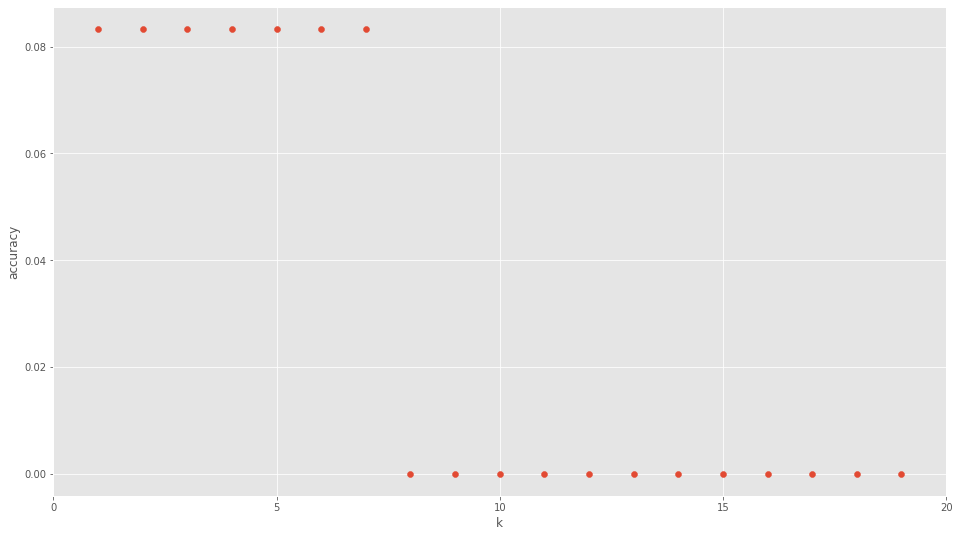

In [9]:
nouns = [ 'abuelo', 'familia', 'frijol','carne','grasa', 'niños','emoción','agua' , 'proteínas', 'mamá', 'juntos','hermano']  

nouns = dataframe.loc[(dataframe['class'] == 'abuelo') | (dataframe['class'] == 'familia') |  
(dataframe['class'] == 'frijol') | (dataframe['class'] == 'carne') | 
(dataframe['class'] == 'grasa') | (dataframe['class'] == 'niños') | 
(dataframe['class'] == 'emoción') | (dataframe['class'] == 'agua')  | (dataframe['class'] == 'proteínas') | (dataframe['class'] == 'mamá') | (dataframe['class'] == 'juntos') | (dataframe['class'] == 'hermano')
]

print (nouns)

X_nouns = nouns.iloc[:,:-1].values
y_nouns = nouns.iloc[:,-1].values

X_train_nouns, X_test_nouns, y_train_nouns, y_test_nouns = train_test_split(X_nouns, y_nouns, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_nouns = scaler.fit_transform(X_train_nouns)
X_test_nouns = scaler.transform(X_test_nouns)

k_range_nouns = range(1, 20)
scores_nouns = []
for k in k_range_nouns:
    knn_nouns = KNeighborsClassifier(n_neighbors = k)
    knn_nouns.fit(X_train_nouns, y_train_nouns)
    scores_nouns.append(knn_nouns.score(X_test_nouns, y_test_nouns))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_nouns, scores_nouns)
plt.xticks([0,5,10,15,20])

# When I add 'proteínas', 'mamá', 'juntos','hermano'; the model decrease the optimal number of neighbors (from 4 to 1) and its accuracy (from 62% to 8%). Theses added nouns where recognize as Adjectives with a NLP function, which is incorrect, they should be in the Nouns section.

In [10]:
nouns.shape

(48, 481)

In [38]:
n_neighbors_nouns = 1
 
knn_nouns = KNeighborsClassifier(n_neighbors_nouns)
knn_nouns.fit(X_train_nouns, y_train_nouns)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_nouns.score(X_train_nouns, y_train_nouns)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_nouns.score(X_test_nouns, y_test_nouns)))
	 
	 
pred_nouns = knn_nouns.predict(X_test_nouns)
print(confusion_matrix(y_test_nouns, pred_nouns))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.08
[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0]]


# Nouns (some nouns) 
# Better accuracy in test (4 neighbors): 62 %

            0         1         2         3         4         5         6  \
0    0.536879  0.560019  0.574746  0.588373  0.514476  0.498891  0.487184   
1    0.450507  0.477267  0.494116  0.505951  0.430992  0.417016  0.403644   
2    0.451338  0.472543  0.487261  0.499483  0.424764  0.410258  0.395362   
3    0.504347  0.515761  0.526263  0.535340  0.479179  0.460419  0.441318   
4    0.518540  0.542916  0.558174  0.575456  0.492735  0.471874  0.453949   
5    0.478243  0.508314  0.523445  0.539512  0.455030  0.437807  0.422586   
6    0.472640  0.504562  0.522201  0.539060  0.449705  0.432505  0.419257   
7    0.487264  0.516230  0.530548  0.543161  0.463216  0.443090  0.425880   
28   0.495021  0.522931  0.541815  0.555084  0.468036  0.448843  0.432819   
29   0.496863  0.518384  0.530249  0.544904  0.465836  0.444285  0.426914   
30   0.489293  0.513037  0.526847  0.542634  0.459023  0.437833  0.421602   
31   0.491831  0.520868  0.534967  0.547130  0.466602  0.448930  0.432632   

([<matplotlib.axis.XTick at 0x1bbc9b3bb88>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

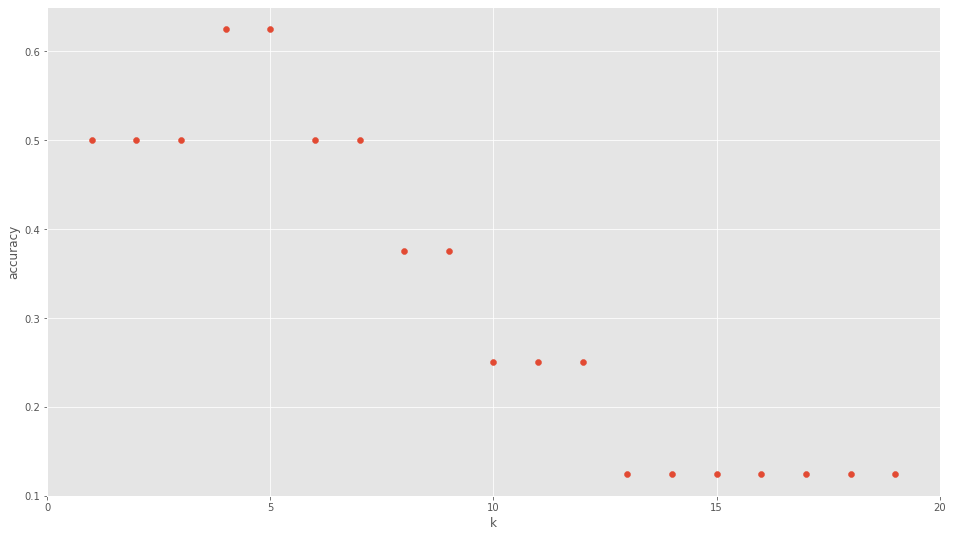

In [12]:
nouns_2 = [ 'abuelo', 'familia', 'frijol','carne','grasa', 'niños','emoción','agua']  

nouns_2 = dataframe.loc[(dataframe['class'] == 'abuelo') | (dataframe['class'] == 'familia') |  
(dataframe['class'] == 'frijol') | (dataframe['class'] == 'carne') | 
(dataframe['class'] == 'grasa') | (dataframe['class'] == 'niños') | 
(dataframe['class'] == 'emoción') | (dataframe['class'] == 'agua')  
]

print (nouns_2)

X_nouns_2 = nouns_2.iloc[:,:-1].values
y_nouns_2 = nouns_2.iloc[:,-1].values

X_train_nouns_2, X_test_nouns_2, y_train_nouns_2, y_test_nouns_2 = train_test_split(X_nouns_2, y_nouns_2, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_nouns_2 = scaler.fit_transform(X_train_nouns_2)
X_test_nouns_2 = scaler.transform(X_test_nouns_2)

k_range_nouns_2 = range(1, 20)
scores_nouns_2 = []
for k in k_range_nouns_2:
    knn_nouns_2 = KNeighborsClassifier(n_neighbors = k)
    knn_nouns_2.fit(X_train_nouns_2, y_train_nouns_2)
    scores_nouns_2.append(knn_nouns_2.score(X_test_nouns_2, y_test_nouns_2))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_nouns_2, scores_nouns_2)
plt.xticks([0,5,10,15,20])





In [14]:
nouns_2.shape

(32, 481)

In [40]:
n_neighbors_nouns_2 = 4
 
knn_nouns_2 = KNeighborsClassifier(n_neighbors_nouns_2)
knn_nouns_2.fit(X_train_nouns_2, y_train_nouns_2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_nouns_2.score(X_train_nouns_2, y_train_nouns_2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_nouns_2.score(X_test_nouns_2, y_test_nouns_2)))
	 
	 
pred_nouns_2 = knn_nouns_2.predict(X_test_nouns_2)
print(confusion_matrix(y_test_nouns_2, pred_nouns_2))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.62
[[1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]]


# Adjectives
# - Better accuracy in test (1 neighbor ) : 60% 

In [15]:
adjs = [ 'diferentes', 'quinto', 'fácil','fuerte','sexto']

adjs = dataframe.loc[(dataframe['class'] == 'diferentes') | 
(dataframe['class'] == 'quinto') |  (dataframe['class'] == 'fácil') | 
(dataframe['class'] == 'fuerte') | 
(dataframe['class'] == 'sexto')
]

print (adjs)



            0         1         2         3         4         5         6  \
68   0.479600  0.511902  0.531361  0.551394  0.470531  0.456786  0.444981   
69   0.503558  0.535218  0.550782  0.565392  0.478593  0.457565  0.441914   
70   0.498212  0.528249  0.545099  0.560709  0.477936  0.457857  0.439657   
71   0.508577  0.526550  0.540662  0.553728  0.476711  0.456658  0.435390   
100  0.491898  0.521313  0.539078  0.556442  0.467519  0.448265  0.431261   
101  0.489899  0.520700  0.536029  0.552486  0.468171  0.448968  0.433032   
102  0.514966  0.527915  0.539655  0.548271  0.481055  0.461599  0.442561   
103  0.502004  0.524666  0.539637  0.551358  0.472171  0.452842  0.433509   
104  0.482871  0.513168  0.531056  0.543911  0.456000  0.438184  0.420161   
105  0.512657  0.539713  0.554011  0.568858  0.486559  0.465530  0.448503   
106  0.510563  0.544417  0.558503  0.574336  0.487719  0.467445  0.450443   
107  0.510625  0.539368  0.555157  0.568658  0.484407  0.464712  0.446419   

In [16]:
adjs.shape

(20, 481)

In [42]:
X_adjs = adjs.iloc[:,:-1].values
y_adjs = adjs.iloc[:,-1].values

X_train_adjs, X_test_adjs, y_train_adjs, y_test_adjs = train_test_split(X_adjs, y_adjs, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()   
X_train_adjs = scaler.fit_transform(X_train_adjs)
X_test_adjs = scaler.transform(X_test_adjs)



In [48]:
X_adjs

array([[0.47960028, 0.51190156, 0.53136116, 0.55139422, 0.47053084,
        0.45678586, 0.44498143, 0.59872311, 0.43584436, 0.50904691,
        0.45501938, 0.73663038, 0.33115011, 0.78929973, 0.1949804 ,
        0.57589841, 0.33088344, 0.5233193 , 0.34807912, 0.5397343 ,
        0.35672837, 0.54870558, 0.3630257 , 0.53389025, 0.46482569,
        0.50331497, 0.5248906 , 0.54474568, 0.45627359, 0.44338104,
        0.42825085, 0.58780146, 0.42034701, 0.50256592, 0.44052976,
        0.72734928, 0.32362807, 0.78702909, 0.19683945, 0.57344556,
        0.32931224, 0.5069499 , 0.3242861 , 0.52657568, 0.3331652 ,
        0.53786039, 0.3473312 , 0.52548867, 0.47083494, 0.50793827,
        0.52964085, 0.54879367, 0.45768353, 0.44555795, 0.43018338,
        0.58873606, 0.42032793, 0.50890088, 0.44459835, 0.72811711,
        0.32396728, 0.78528267, 0.19665213, 0.57579863, 0.30131283,
        0.50954533, 0.27313086, 0.52229804, 0.27503365, 0.53379977,
        0.30199367, 0.52604219, 0.47370353, 0.51

In [49]:
y_adjs

array(['diferentes', 'diferentes', 'diferentes', 'diferentes', 'fuerte',
       'fuerte', 'fuerte', 'fuerte', 'fácil', 'fácil', 'fácil', 'fácil',
       'quinto', 'quinto', 'quinto', 'quinto', 'sexto', 'sexto', 'sexto',
       'sexto'], dtype=object)

In [43]:
X_test_adjs.shape

(5, 480)

In [44]:
y_test_adjs.shape

(5,)

KNeighborsClassifier(n_neighbors=1)
KNeighborsClassifier(n_neighbors=2)
KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifier(n_neighbors=4)
KNeighborsClassifier()
KNeighborsClassifier(n_neighbors=6)
KNeighborsClassifier(n_neighbors=7)
KNeighborsClassifier(n_neighbors=8)
KNeighborsClassifier(n_neighbors=9)
KNeighborsClassifier(n_neighbors=10)
KNeighborsClassifier(n_neighbors=11)
KNeighborsClassifier(n_neighbors=12)
KNeighborsClassifier(n_neighbors=13)
KNeighborsClassifier(n_neighbors=14)
KNeighborsClassifier(n_neighbors=15)


([<matplotlib.axis.XTick at 0x1bff8d60848>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

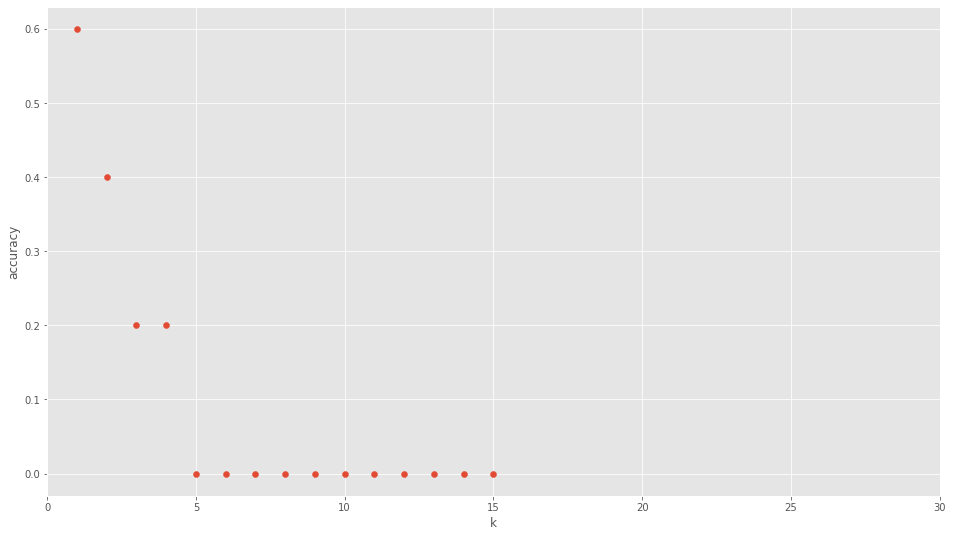

In [53]:
#Here the range in which you should search for the optimal number of neighbors was reduced because the maximum number of samples is 15, so the range of neighboars should also be between 1 and 15.
k_range_adjs = range(1, 16)
scores_adjs = []
for k in k_range_adjs:
    knn_adjs = KNeighborsClassifier(n_neighbors = k)
    print (knn_adjs)
    knn_adjs.fit(X_train_adjs, y_train_adjs)
    scores_adjs.append(knn_adjs.score(X_test_adjs, y_test_adjs))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_adjs, scores_adjs)
plt.xticks([0,5,10,15,20,25,30])

In [54]:
n_neighbors_adjs = 1
 
knn_adjs = KNeighborsClassifier(n_neighbors_adjs)
knn_adjs.fit(X_train_adjs, y_train_adjs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_adjs.score(X_train_adjs, y_train_adjs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_adjs.score(X_test_adjs, y_test_adjs)))
	 
	 
pred_adjs = knn_adjs.predict(X_test_adjs)
print(confusion_matrix(y_test_adjs, pred_adjs))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.60
[[0 1 0 0]
 [0 1 1 0]
 [0 0 0 0]
 [0 0 0 2]]
